In [1]:
import parselmouth
import os.path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg
import sys

import shutil  # copy files
from os import path

In [ ]:
# to show numpy array to the full 
import sys
np.set_printoptions(threshold=sys.maxsize)

# read .wav files

In [224]:
# read .wav files and make mono .wav files 
def read_wav(wav_file):
    print("processing {}...".format(wav_file))
    snd = parselmouth.Sound(wav_file)
    
    # extract channels
    if len(snd.extract_all_channels()) == 2:
        snd_A = snd.extract_all_channels()[0]
        snd_B = snd.extract_all_channels()[1]
        
        # save wave files       
        snd_A.save(os.path.splitext(wav_file)[0] + "A.wav", 'WAV')
        snd_B.save(os.path.splitext(wav_file)[0] + "B.wav", 'WAV')

In [ ]:
# run once? extract 2-channel .wav files
for wav_file in glob.glob("../data/*.wav"):
#snd_A, snd_B, path_A, path_B = read_wav("../data/sw2005.wav")
    read_wav(wav_file)

In [243]:
# remove precessed 2-channel .wav files
for f in glob.glob("../data/sw????.wav"):
    os.remove(f)

In [118]:
# del

# copy transcripts to the working dir
wav_paths = glob.glob("../data/*.wav")
names = []
for p in wav_paths:
    names.append(p[10:15])
print(names)
names = sorted(names)
print(names)
print(len(names))

# delete an assigned variable
del path
del wav_paths
del names

import shutil
from os import path

trans_path_list =[]
for i in range(len(names)):
    trans_path = glob.glob("../switchboard_word_alignments/swb_ms98_transcriptions/*/*/sw"+names[i] + "-ms98-a-word.text")
    if len(trans_path) != 0:
        trans_path_list.append(trans_path[0])
print(trans_path_list)
print(len(trans_path_list))

# copy transcript files to wave file dir 
for tp in trans_path_list:
    if path.exists(tp):
        # path of source file
        src = path.realpath(tp)
        # head = path, tail = file name
        head, tail= path.split(src)
        # path of destinition
        dst = "../data/" + tail
        print(dst)
        shutil.copy(src, dst)

['2191B', '4531A', '2191A', '4531B', '2450A', '3083A', '2348B', '4320B', '3324B', '2450B', '3083B', '2348A', '4320A', '3324A', '2565B', '3817A', '3817B', '2565A', '2636A', '3601B', '4721A', '2636B', '3601A', '4721B', '3301A', '2005A', '3301B', '2005B', '3044B', '2710B', '4021A', '3044A', '2710A', '4021B', '2222A', '3203B', '4010B', '2886B', '2222B', '3203A', '4010A', '2886A', '4400A', '4400B']
['2005A', '2005B', '2191A', '2191B', '2222A', '2222B', '2348A', '2348B', '2450A', '2450B', '2565A', '2565B', '2636A', '2636B', '2710A', '2710B', '2886A', '2886B', '3044A', '3044B', '3083A', '3083B', '3203A', '3203B', '3301A', '3301B', '3324A', '3324B', '3601A', '3601B', '3817A', '3817B', '4010A', '4010B', '4021A', '4021B', '4320A', '4320B', '4400A', '4400B', '4531A', '4531B', '4721A', '4721B']
44


# read transcription files

In [260]:
# read transcription files and add headers
def read_trans(trans_path):
    trans = pd.read_csv(trans_path, sep= "\s+", header=None)
    
    # for ptree_word_alignments
    #trans.columns = ["ms_id", "ldc_id", "start_time", "end_time", "tag", "ldc_trans", "ms_trans"]
    
    # for swb_ms98_transcriptions
    trans.columns = ["ms_id", "start_time", "end_time", "ms_trans"]
    
    # drop rows which have the same start time
    trans = trans.drop_duplicates(subset="end_time")
    
    # however index cannot be reset, so convert df to nparray
    trans = trans.to_numpy()
    
    # endtime cannot be 0 in case of error in creating .textgrid
    trans = np.delete(trans, np.where(trans[:, 2]==0)[0], axis=0)
    
    return trans

In [259]:
trans = pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/data/sw3301A-ms98-a-word.text", sep= "\s+", header=None)
trans.columns = ["ms_id", "start_time", "end_time", "ms_trans"]
trans = trans.drop_duplicates(subset="end_time")
trans = trans.to_numpy()
print(len(trans))

# end time in 1st row cannot be 0
trans = np.delete(trans, np.where(trans[:, 2]==0)[0], axis=0)
print(len(trans))
print(trans)

840
839
[['sw3301A-ms98-a-0001' 0.0 0.011375 '[noise]']
 ['sw3301A-ms98-a-0001' 0.011375 0.061625 'feel']
 ['sw3301A-ms98-a-0001' 0.061625 0.42 'about']
 ['sw3301A-ms98-a-0001' 0.42 0.76 'um']
 ['sw3301A-ms98-a-0001' 0.76 0.82 'the']
 ['sw3301A-ms98-a-0001' 0.82 1.09 'Russian']
 ['sw3301A-ms98-a-0001' 1.09 1.63 'situation']
 ['sw3301A-ms98-a-0001' 1.63 1.78 'right']
 ['sw3301A-ms98-a-0001' 1.78 2.04425 'now']
 ['sw3301A-ms98-a-0001' 2.04425 2.797625 '[silence]']
 ['sw3301A-ms98-a-0002' 2.797625 13.66025 '[silence]']
 ['sw3301A-ms98-a-0003' 13.66025 14.20275 '[silence]']
 ['sw3301A-ms98-a-0003' 14.20275 14.642 'um-hum']
 ['sw3301A-ms98-a-0003' 14.642 15.036375 '[silence]']
 ['sw3301A-ms98-a-0004' 15.036375 18.88175 '[silence]']
 ['sw3301A-ms98-a-0005' 18.88175 19.39175 '[silence]']
 ['sw3301A-ms98-a-0005' 19.39175 19.57275 'um']
 ['sw3301A-ms98-a-0005' 19.57275 19.712875 'it']
 ['sw3301A-ms98-a-0005' 19.712875 19.87175 'is']
 ['sw3301A-ms98-a-0005' 19.87175 20.17175 'very']
 ['sw3301A-m

# create a TextGrid

In [ ]:
# get path list and trans list
trans_paths = sorted(glob.glob("../data/*.text"))
print(trans_paths)
sound_paths = sorted(glob.glob("../data/*.wav"))
print(sound_paths)

for i in range(len(sound_paths)):
    print(trans_paths[i], sound_paths[i])

In [261]:
# function to create a TextGrid 
def text_grid(sound, trans):
    snd = parselmouth.Sound(sound)
    tg = parselmouth.praat.call(snd, "To TextGrid", "word", "")
    
    trans = read_trans(trans)
    
    # call.() or parselmouth.praat.call()?
    # timeit df.index < df.shape < df.[0].count()
    for i in range(len(trans)):
        if i < len(trans)-1:
            # one time point can only insert one boundary, need to delete rows with same time points
            # parselmouth.praat.call(tg, "Insert boundary", 1, trans.start_time[i+1])
            parselmouth.praat.call(tg, "Insert boundary", 1, trans[i, 2])
            parselmouth.praat.call(tg, "Set interval text", 1, i+1, trans[i, 3])
        else:
            parselmouth.praat.call(tg, "Set interval text", 1, i+1, trans[i, 3])
        
    tg.save(os.path.splitext(sound)[0] + ".TextGrid")

In [262]:
# create .TextGrid files
for i in range(len(sound_paths)):
    text_grid(sound_paths[i], trans_paths[i]) 

# feature extraction

In [37]:
# run Purdue Praat script to do feature extraction
parselmouth.praat.run_file("../data/stats/stats_batch.praat", "../data/wavinfo_list.txt", "../data/pf/", "no")

PraatError: Cannot open file “/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/Prosody-and-Perplexity/../data/demo/data/sw2005A-word.TextGrid”.
Script line 317 not performed or completed:
« Read from file... 'gv_word_textgrid$' »
Script not completed.

In [11]:
# demo pf of Purdue tool
pf = pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/praat-prosody_v0.1.1/demo/work_dir/pf_files/demo_C-pf.Tab", sep='\t')
pf

,WORD$,WAV$,SPKR_ID$,GEN$,WORD_START,WORD_END,FWORD$,FWORD_START,FWORD_END,PAUSE_START,...,AVG_PHONE_DUR_NSP,MAX_PHONE_DUR_NSP,AVG_VOWEL_DUR_Z,MAX_VOWEL_DUR_Z,AVG_VOWEL_DUR_N,MAX_VOWEL_DUR_N,AVG_VOWEL_DUR_ZSP,MAX_VOWEL_DUR_ZSP,AVG_VOWEL_DUR_NSP,MAX_VOWEL_DUR_NSP
0,UMHM,../demo/data/demo_C.wav,C,female,672,709,OKAY,1442,1464,709,...,?,?,0.576141,1.743788,1.559701,2.694030,0.2886751345948128,1.1547005383792515,1.3199999999999998,2.28
1,OKAY,../demo/data/demo_C.wav,C,female,1442,1464,I'LL,1464,1485,1464,...,?,?,-0.779463,-0.621370,0.557160,0.651163,?,?,?,?
2,I'LL,../demo/data/demo_C.wav,C,female,1464,1485,I'LL,1547,1557,1485,...,1.5897435897435899,1.8461538461538463,0.616212,0.616212,1.560976,1.560976,1.1013775835078696,1.1013775835078696,1.8461538461538463,1.8461538461538463
3,I'LL,../demo/data/demo_C.wav,C,female,1547,1557,WRITE,1557,1580,1557,...,0.8038461538461539,0.8076923076923077,-0.348294,-0.348294,0.682927,0.682927,-0.25031308716087936,-0.25031308716087936,0.8076923076923077,0.8076923076923077
4,WRITE,../demo/data/demo_C.wav,C,female,1557,1580,YOU,1608,1627,1580,...,?,?,-0.776963,-0.776963,0.292683,0.292683,-0.8510644963469899,-0.8510644963469899,0.3461538461538462,0.3461538461538462
5,YOU,../demo/data/demo_C.wav,C,female,1608,1627,TELL,1630,1652,1627,...,1.1928879310344827,1.4482758620689655,0.564076,0.564076,1.250000,1.250000,-0.13245323570650425,-0.13245323570650425,0.9375,0.9375
6,TELL,../demo/data/demo_C.wav,C,female,1630,1652,ME,1652,1668,1652,...,?,?,1.733081,1.733081,2.115385,2.115385,?,?,?,?
7,ME,../demo/data/demo_C.wav,C,female,1652,1668,YOU,1677,1689,1668,...,1.1014285714285714,1.5599999999999998,0.434727,0.434727,1.322034,1.322034,1.12089707663561,1.12089707663561,1.5599999999999998,1.5599999999999998
8,YOU,../demo/data/demo_C.wav,C,female,1677,1689,TELL,1689,1714,1689,...,0.7467672413793104,0.9310344827586208,-0.564076,-0.564076,0.750000,0.750000,-0.9271726499455304,-0.9271726499455304,0.5625,0.5625
9,TELL,../demo/data/demo_C.wav,C,female,1689,1714,ME,1714,1725,1714,...,?,?,-0.059761,-0.059761,0.961538,0.961538,?,?,?,?


In [ ]:
### run once

# copy prosodic feature files to wave file dir 
for pfp in glob.glob("../prosody_pro/test all/*.means"):
    if path.exists(pfp):
        # path of source file
        src = path.realpath(pfp)
        # head = path, tail = file name
        head, tail= path.split(src)
        # path of destinition
        dst = "../data/" + tail
        print(dst)
        shutil.copy(src, dst)

In [41]:
# pf tables of multi-files
pfs = []
for pfp in sorted(glob.glob("../data/*.means")):
    pf_df = pd.read_csv(pfp, sep= "\s+")
    pf_arr = pf_df.to_numpy()
    pf_arr = np.where(pf_arr == "--undefined--", 0.0, pf_arr)
    
    # colunms = ["rowlabel", "maxf0", "minf0", "excursion_size", "meanf0", "finalf0", "mean_intensity", "duration", "max_velocity", "final_velocity", "maxf0_loc_ms", "maxf0_loc_ratio"]
    pfs.append(pf_arr)
#print(len(pfs))
#print(pfs)

In [42]:
len_list1 = []
for pf in pfs:
    print(pf.shape)
    len_list1.append(pf.shape[0])
print(len_list1)

(1381, 12)
(964, 12)
(711, 12)
(627, 12)
(820, 12)
(603, 12)
(1753, 12)
(689, 12)
(285, 12)
(195, 12)
(866, 12)
(522, 12)
(633, 12)
(1643, 12)
(1287, 12)
(1030, 12)
(1168, 12)
(454, 12)
(908, 12)
(393, 12)
(963, 12)
(676, 12)
(768, 12)
(681, 12)
(839, 12)
(532, 12)
(565, 12)
(771, 12)
(392, 12)
(796, 12)
(477, 12)
(820, 12)
(596, 12)
(806, 12)
(657, 12)
(728, 12)
(812, 12)
(477, 12)
(759, 12)
(571, 12)
(666, 12)
(714, 12)
(736, 12)
(568, 12)
[1381, 964, 711, 627, 820, 603, 1753, 689, 285, 195, 866, 522, 633, 1643, 1287, 1030, 1168, 454, 908, 393, 963, 676, 768, 681, 839, 532, 565, 771, 392, 796, 477, 820, 596, 806, 657, 728, 812, 477, 759, 571, 666, 714, 736, 568]


In [43]:
# word importance tables
wimps = []
len_list2 = []
for wimpp in sorted(glob.glob("../wimp_corpus/annotations/*/*/*word.text")):
    wimp_df = pd.read_csv(wimpp, sep= "\s+", header = None)
    wimp_df.columns = ["ms_id", "start_time", "end_time", "wimp"]
    wimp_df = wimp_df.drop_duplicates(subset="end_time")
    wimp_arr = wimp_df.to_numpy()
    
    # end time in 1st row cannot be 0
    wimp_arr = np.delete(wimp_arr, np.where(wimp_arr[:, 2]==0)[0], axis=0)
    
    wimp = wimp_arr[:, 3]
    
    # check why wimps size != pfs size
    print(len(wimp))
    len_list2.append(len(wimp))

    # colunms = ["rowlabel", "maxf0", "minf0", "excursion_size", "meanf0", "finalf0", "mean_intensity", "duration", "max_velocity", "final_velocity", "maxf0_loc_ms", "maxf0_loc_ratio"]
    wimps.append(wimp)

print(len_list2)
    
    
#print(len(wimps))
#print(wimps)

1381
964
711
627
820
603
1753
689
285
195
866
522
633
1643
1287
1030
1168
454
908
393
963
676
768
681
839
532
565
771
392
796
477
820
596
806
657
728
812
477
759
571
666
714
736
568
[1381, 964, 711, 627, 820, 603, 1753, 689, 285, 195, 866, 522, 633, 1643, 1287, 1030, 1168, 454, 908, 393, 963, 676, 768, 681, 839, 532, 565, 771, 392, 796, 477, 820, 596, 806, 657, 728, 812, 477, 759, 571, 666, 714, 736, 568]


In [44]:
# check if pfs and wimps have the same size
# by checking if an element is/is not in a list

for ele in len_list1:
    print(ele in len_list2)
    if ele not in len_list2:
        print(len_list1.index(ele))
        print(sorted(glob.glob("../wimp_corpus/annotations/*/*/*word.text"))[len_list1.index(ele)])
        print(len(wimps[len_list1.index(ele)]))
        print(pfs[len_list1.index(ele)].shape[0])
        

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [45]:
del ele, len_list1, len_list2

In [24]:
# demo pfs

pf_df_test = pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/data/sw2005B.means", sep= "\s+")
# print(pf_df_test)
#pf_df_test.to_numpy()
type(pf_df_test["maxf0"])

pandas.core.series.Series

In [46]:
# flatten word importance data

flat_wimps = []
for wimp in wimps:
    for wi in wimp:
        flat_wimps.append(wi)
print(len(flat_wimps))
flat_wimps = np.array(flat_wimps)

33302


In [47]:
# create feature dict
feature_dict = {"maxf0": 1, "minf0": 2, "excursion_size": 3, 
                "meanf0": 4, "finalf0": 5, "mean_intensity": 6, 
                "duration": 7, "max_velocity": 8, "final_velocity": 9, 
                "maxf0_loc_ms": 10, "maxf0_loc_ratio": 11}
#print(feature_dict)

finished data cleaning

# compute correlation

## Pearson Correlation Coefficient

now processing:  ../prosody_pro/test_sw2005A/duration
[[ 1.         -0.01155001]
 [-0.01155001  1.        ]]
now processing:  ../prosody_pro/test_sw2005A/excursionsize
[[1.         0.11720182]
 [0.11720182 1.        ]]
now processing:  ../prosody_pro/test_sw2005A/finalf0
[[ 1.         -0.02703742]
 [-0.02703742  1.        ]]
now processing:  ../prosody_pro/test_sw2005A/finalvelocity
[[1.00000000e+00 1.33448987e-04]
 [1.33448987e-04 1.00000000e+00]]
now processing:  ../prosody_pro/test_sw2005A/maxf0
[[1.         0.01577036]
 [0.01577036 1.        ]]
now processing:  ../prosody_pro/test_sw2005A/maxf0_loc_ms
[[ 1.         -0.04917057]
 [-0.04917057  1.        ]]
now processing:  ../prosody_pro/test_sw2005A/maxf0_loc_ratio
[[ 1.        -0.1514473]
 [-0.1514473  1.       ]]
now processing:  ../prosody_pro/test_sw2005A/maxvelocity
[[1.         0.04750583]
 [0.04750583 1.        ]]
now processing:  ../prosody_pro/test_sw2005A/meanf0
[[1.         0.36801756]
 [0.36801756 1.        ]]
now proce

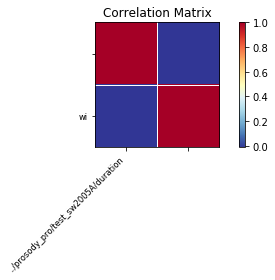

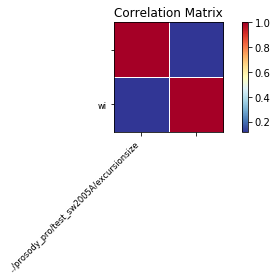

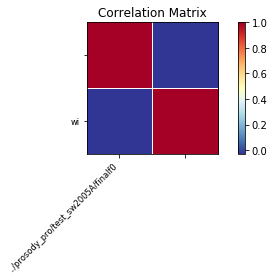

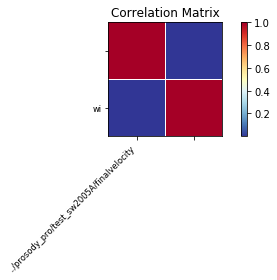

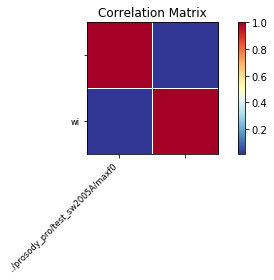

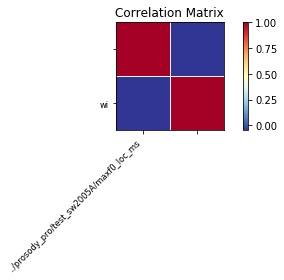

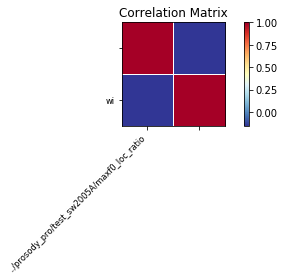

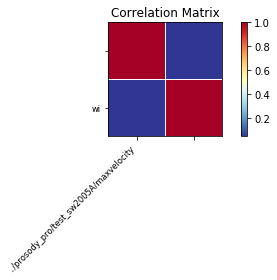

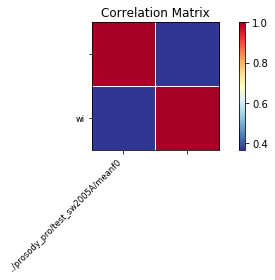

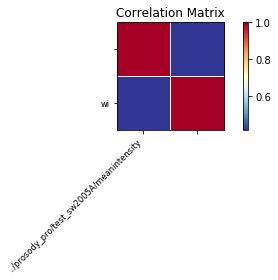

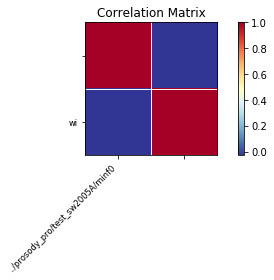

In [167]:
### del
### codes for reading data from .txt pf files


cor_path_list = sorted(glob.glob("../prosody_pro/test_sw2005A/*.txt"))

wi= pd.read_csv("/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/wimp_corpus/annotations/20/2005/sw2005A-ms98-a-word.text", sep="\s+", header=None, engine="python")

#wi = np.loadtxt(fname = "/Users/the-imitation-gamer/Documents/SLP/Msc_Dissertation/wimp_corpus/annotations/20/2005/sw2005A-ms98-a-word.text")
wi.columns = ["ms_id", "start_time", "end_time", "imp"]
wi = wi.imp.to_numpy()

# try to replace 0 with a small value
#wi = np.where(wi == 0, 0.05, wi)
# print(wi)
# print(len(wi))



for i in range(len(cor_path_list)):
    pf_test=pd.read_csv(cor_path_list[i], sep='\t')
    print("now processing: ", os.path.splitext(cor_path_list[i])[0])
    # print(pf_test)
    pf_test=pf_test.to_numpy()
    # print(pf_test.shape)
    slope_test = pf_test[0][1:]
    slope_test = np.where(slope_test == "--undefined--", 0, slope_test)
    slope_test = np.absolute(slope_test)
    # print(slope_test)
    
    c_matrix = np.array([slope_test, wi])
    # cast c_matrix to float incase of the attribuet error of .cov()
    corr_matrix = np.corrcoef(c_matrix.astype(float))
    print(corr_matrix)
    smg.plot_corr(corr_matrix, xnames=[os.path.splitext(cor_path_list[i])[0]], ynames=["wi"])
    #plt.show()
    
    plt.savefig(os.path.splitext(cor_path_list[i])[0] + ".jpg")

In [48]:
# compute cor-co for multiple files

# def correlation
# input: number of samples, feature_name_1, feature_name_2
# output: coefficient, plot

def correlation(num, feature):
    
    flat_pf = []
    for pf in pfs:
        for item in pf[:, feature_dict[feature]]:
            flat_pf.append(item)
    flat_pf = np.array(flat_pf)
    
    
    c_matrix = np.array([flat_pf[:num], flat_wimps[:num]])
    #print(c_matrix)
    
    corr_matrix = np.corrcoef(c_matrix.astype(float))
    print(corr_matrix)
    smg.plot_corr(corr_matrix, xnames=[feature], ynames=["wi"])
    plt.show()

[[1.         0.41178109]
 [0.41178109 1.        ]]


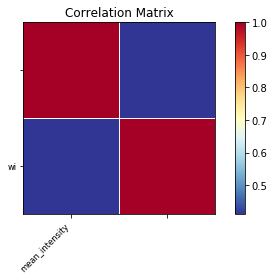

[[1.         0.37754034]
 [0.37754034 1.        ]]


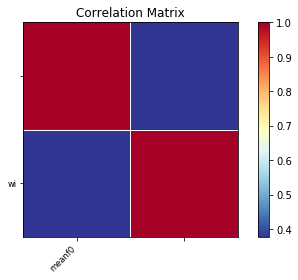

In [49]:
correlation(5000, "mean_intensity")
correlation(5000, "meanf0")

(33302,)
(33302,)
[[1.         0.40135501]
 [0.40135501 1.        ]]


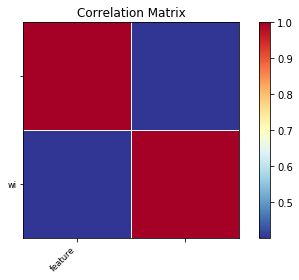

In [55]:
# test feature combination: meanf0 + mean intensity

flat_pf1 = []
for pf in pfs:
    for item in pf[:, feature_dict["mean_intensity"]]:
        flat_pf1.append(item)
flat_pf1 = np.asarray(flat_pf1, dtype=float)
print(flat_pf1.shape)

flat_pf2 = []
for pf in pfs:
    for item in pf[:, feature_dict["meanf0"]]:
        flat_pf2.append(item)
flat_pf2 = np.asarray(flat_pf2, dtype=float)
print(flat_pf2.shape)

flat_pf_add = np.add(flat_pf1, flat_pf2)

c_matrix = np.array([flat_pf_add[:5000], flat_wimps[:5000]])
#print(c_matrix)
    
corr_matrix = np.corrcoef(c_matrix.astype(float))
print(corr_matrix)
smg.plot_corr(corr_matrix, xnames=["feature"], ynames=["wi"])
plt.show()

In [77]:
test_l = [1.0, 2.0, "--no--"]
print(test_l)
# test_l.shape
for item in test_l:
    if isinstance(item, float):
        item = item
    else:
        item = 0
    print(item)
test_l = np.array(test_l)
print(test_l)

[1.0, 2.0, '--no--']
1.0
2.0
0
['1.0' '2.0' '--no--']


In [169]:
%%capture cap --no-stderr
print ('stuff no')
with open('../result/output.txt', 'w') as f:
    f.write(cap.stdout)

In [132]:
np.mean(np.delete(slope_test, "--undefined--")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
